## We create 5 minimal synthetic template models 
These sample models represent different variations of the SIR model and then we demo model composition by composing all the models together.

In [9]:
from mira.metamodel import *

## Create concepts to use for synthetic template models

In [10]:
susceptible = Concept(name="susceptible_population", identifiers={"ido": "0000514"})
exposed = Concept(name="exposed_population", identifiers={"ido":"0000597"})
infected = Concept(name="infected_population", identifiers={"ido": "0000511"})
recovered = Concept(name="immune_population", identifiers={"ido": "0000592"})
dead = Concept(name="dead", identifiers={"ncit": "C28554"})
quarantined = Concept(name="quarantined", identifiers={})

## Define templates to add to synthetic template models

In [11]:
infection = ControlledConversion(
    subject=susceptible,
    outcome=infected,
    controller=infected,
)
recovery = NaturalConversion(
    subject=infected,
    outcome=recovered,
)

reinfection = ControlledConversion(
    subject=recovered,
    outcome=infected,
    controller=infected,
)

to_quarantine = NaturalConversion(
    subject=susceptible,
    outcome=quarantined
)

from_quarantine = NaturalConversion(
    subject=quarantined,
    outcome=susceptible
)

to_exposed = NaturalConversion(
    subject=susceptible,
    outcome=exposed
)

from_exposed_to_infection = ControlledConversion(
    subject=exposed,
    outcome=infected,
    controller=infected,
)

dying = NaturalConversion(
    subject=infected,
    outcome=dead
)

## Create template models to compose

In [12]:
sir = TemplateModel(
    templates=[
        infection,
        recovery,
    ]
)

sir_reinfection = TemplateModel(
    templates=[
        infection,
        recovery,
        reinfection
    ]
)

sir_quarantined = TemplateModel(
    templates = [
        infection,
        to_quarantine,
        from_quarantine,
        recovery
    ]
)

sir_dying = TemplateModel(
    templates = [
        infection,
        dying,
        recovery,
        
    ]
)

seir = TemplateModel(
    templates = [ 
        to_exposed,
        from_exposed_to_infection,
        recovery        
    ]
)

In [13]:
model_list = [sir_reinfection, sir_quarantined, sir_dying, sir, seir]

Comparing model templates: 21it [00:00, 156726.66it/s]
Comparing model concepts: 21it [00:00, 147785.88it/s]
Comparing model templates: 28it [00:00, 153517.01it/s]
Comparing model concepts: 28it [00:00, 91180.52it/s]
Comparing model templates: 28it [00:00, 165409.17it/s]
Comparing model concepts: 28it [00:00, 146434.55it/s]
Comparing model templates: 36it [00:00, 148470.94it/s]
Comparing model concepts: 36it [00:00, 135664.82it/s]


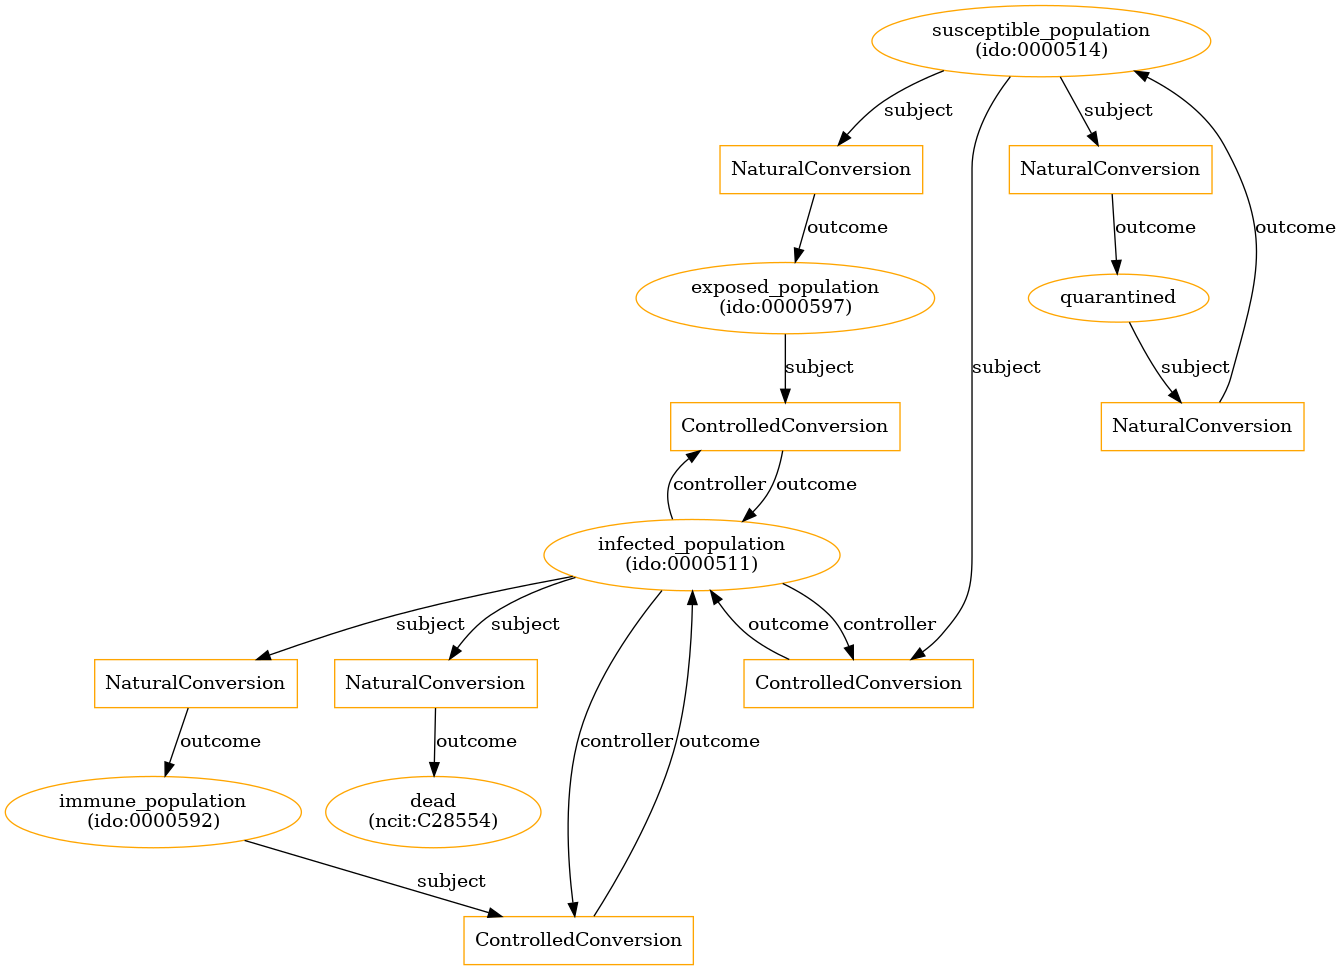

In [14]:
composed_model = compose(model_list)
composed_model.draw_jupyter()

In [15]:
composed_model.get_concepts_map()

{(('ido', '0000514'),
  ()): Concept(name='susceptible_population', display_name=None, description=None, identifiers={'ido': '0000514'}, context={}, units=None),
 (('ido', '0000597'),
  ()): Concept(name='exposed_population', display_name=None, description=None, identifiers={'ido': '0000597'}, context={}, units=None),
 (('ido', '0000511'),
  ()): Concept(name='infected_population', display_name=None, description=None, identifiers={'ido': '0000511'}, context={}, units=None),
 (('ido', '0000592'),
  ()): Concept(name='immune_population', display_name=None, description=None, identifiers={'ido': '0000592'}, context={}, units=None),
 (('ncit', 'C28554'),
  ()): Concept(name='dead', display_name=None, description=None, identifiers={'ncit': 'C28554'}, context={}, units=None),
 (('', 'quarantined'),
  ()): Concept(name='quarantined', display_name=None, description=None, identifiers={}, context={}, units=None)}